In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("Shut in lifts incidents attended by LFB in last 36 months (1).csv", encoding= 'unicode_escape')

# dropping all columns except DateTimeOfCall
df = df[['DateTimeOfCall']]

# extracting date from DateTimeOfCall
import re

incident_date = []
date_pattern = r'(\d{2}/\d{2}/\d{4}) (\d{2}):(\d{2})'

for t in df['DateTimeOfCall']:
    match = re.match(date_pattern, t)
    if(match):
        incident_date.append(match.group(1))
        
df['date'] = incident_date
# df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.drop('DateTimeOfCall', axis = 1, inplace = True)

# extracting borough short code from BoroughCode
# df['bsc'] = [item[-2:] for item in df['BoroughCode']]
# df.drop(['DateTimeOfCall', 'BoroughCode'], axis = 1, inplace = True)
df.head()

,date
0,01/10/2018
1,01/10/2018
2,01/10/2018
3,01/10/2018
4,01/10/2018


In [24]:
X_idx = 0; y_idx = 1

data_dict = {}

for date in df['date']:
      
      key = date
      data_dict[key] = [date, 0]

for idx in range(len(df['date'])):
    
    key = df.loc[idx, 'date']

    if key in data_dict.keys():
        data_dict[key][y_idx] += 1
    else:
        print("Error: The key " + key + " does not exist in the dictionary. Count aborted!")
        break

In [30]:
del df
df = pd.DataFrame()
df['ds'] = np.array([data_dict[idx][X_idx] for idx in data_dict.keys()])
df['y'] = np.array([data_dict[idx][y_idx] for idx in data_dict.keys()])

df['ds'] = pd.to_datetime(df['ds'], format = '%d/%m/%Y')
df.head()

,ds,y
0,2018-10-01,16
1,2018-10-02,17
2,2018-10-03,13
3,2018-10-04,11
4,2018-10-05,15


In [34]:
from prophet import Prophet

m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(df)

In [35]:
future = m.make_future_dataframe ( periods = 90, freq = 'D' )
forecast = m.predict ( future ) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-01,15.813770,6.054581,23.247149,15.813770,15.813770,-0.939808,-0.939808,-0.939808,-0.711804,-0.711804,-0.711804,-1.131229,-1.131229,-1.131229,0.903225,0.903225,0.903225,0.0,0.0,0.0,14.873962
1,2018-10-02,15.815226,7.308856,23.413074,15.815226,15.815226,-0.724373,-0.724373,-0.724373,-0.711804,-0.711804,-0.711804,-0.843909,-0.843909,-0.843909,0.831340,0.831340,0.831340,0.0,0.0,0.0,15.090853
2,2018-10-03,15.816682,6.533691,23.483503,15.816682,15.816682,-0.799355,-0.799355,-0.799355,-0.711804,-0.711804,-0.711804,-0.843214,-0.843214,-0.843214,0.755664,0.755664,0.755664,0.0,0.0,0.0,15.017328
3,2018-10-04,15.818138,6.247397,23.277960,15.818138,15.818138,-1.036228,-1.036228,-1.036228,-0.711804,-0.711804,-0.711804,-1.001752,-1.001752,-1.001752,0.677328,0.677328,0.677328,0.0,0.0,0.0,14.781911
4,2018-10-05,15.819594,8.615429,25.242287,15.819594,15.819594,0.906608,0.906608,0.906608,-0.711804,-0.711804,-0.711804,1.020919,1.020919,1.020919,0.597493,0.597493,0.597493,0.0,0.0,0.0,16.726202


In [36]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1181,2021-12-25,15.901708,10.434409,27.776659,15.643449,16.177589,2.821881,2.821881,2.821881,-0.711804,-0.711804,-0.711804,2.950783,2.950783,2.950783,0.582902,0.582902,0.582902,0.0,0.0,0.0,18.723589
1182,2021-12-26,15.909350,6.998066,23.662142,15.647565,16.188936,-0.457592,-0.457592,-0.457592,-0.711804,-0.711804,-0.711804,-0.151597,-0.151597,-0.151597,0.405810,0.405810,0.405810,0.0,0.0,0.0,15.451758
1183,2021-12-27,15.916992,5.278879,21.944827,15.651599,16.200284,-1.618502,-1.618502,-1.618502,-0.711804,-0.711804,-0.711804,-1.131229,-1.131229,-1.131229,0.224531,0.224531,0.224531,0.0,0.0,0.0,14.298489
1184,2021-12-28,15.924634,5.535366,22.093545,15.655633,16.211631,-1.514379,-1.514379,-1.514379,-0.711804,-0.711804,-0.711804,-0.843909,-0.843909,-0.843909,0.041334,0.041334,0.041334,0.0,0.0,0.0,14.410255
1185,2021-12-29,15.932276,5.755196,22.421899,15.659713,16.222916,-1.696492,-1.696492,-1.696492,-0.711804,-0.711804,-0.711804,-0.843214,-0.843214,-0.843214,-0.141474,-0.141474,-0.141474,0.0,0.0,0.0,14.235783


In [37]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-10-01,14.873962
1,2018-10-02,15.090853
2,2018-10-03,15.017328
3,2018-10-04,14.781911
4,2018-10-05,16.726202
...,...,...
1181,2021-12-25,18.723589
1182,2021-12-26,15.451758
1183,2021-12-27,14.298489
1184,2021-12-28,14.410255


(-1.0, 42.0)

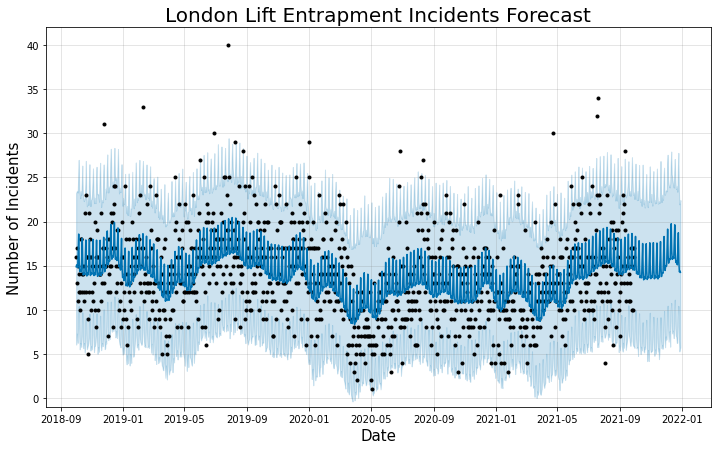

In [49]:
plot_1_London = m.plot(forecast)
ax = plot_1_London.gca()
ax.set_title("London Lift Entrapment Incidents Forecast", size=20)
ax.set_xlabel("Date", size=15)
ax.set_ylabel("Number of Incidents", size=15)
ax.set_ylim(-1, 42)

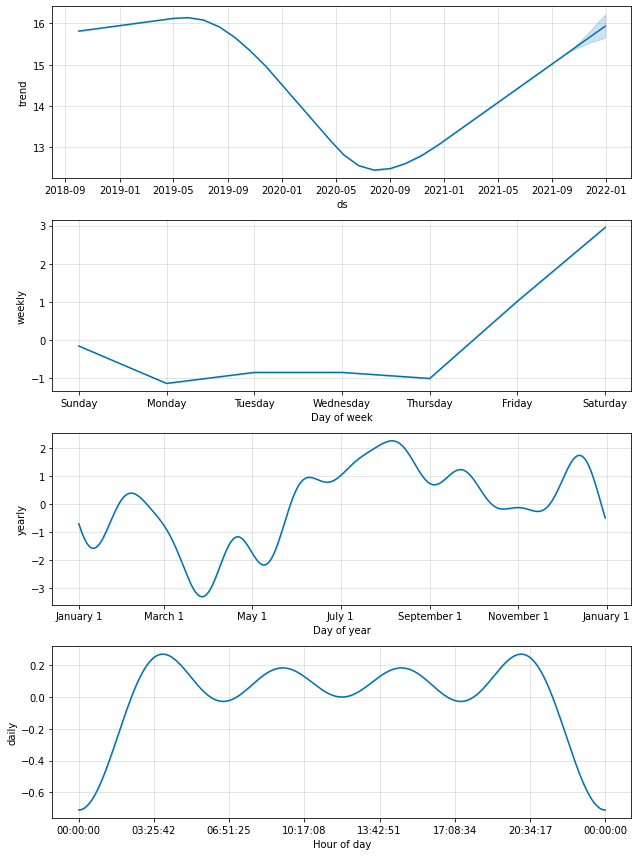

In [50]:
plot_2_London = m.plot_components(forecast)